# Andamento dei casi positivi

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('../covid-19-marche.csv', header=0, parse_dates=True)

# Convert data to European format
data['data'] = pd.to_datetime(data['data']).dt.strftime('%d/%m/%Y')

last_update = data['data'][data.index[-1]]

# Inhabitants by province
ABITANTI_PU = 358886
ABITANTI_AN = 471228
ABITANTI_MC = 312235
ABITANTI_FM = 172770
ABITANTI_AP = 206511

---

In [2]:
# Info
print('----- Dati aggiornati al: ' + str(last_update) + ' -----')
print('\n- Totale persone sottoposte a test: ' + str(int(data['tamponi_totali_casi_diagnosticati'].max())))
print('- Media di persone sottoposte a test ogni giorno: ' + str(int(data['tamponi_odierni_casi_diagnosticati'].mean())))
print('\n- Totale persone risultate positive: ' + str(int(data['tamponi_totali_casi_positivi'].max())))
print('- Media di persone risultate positive al test ogni giorno: ' + str(int(data['tamponi_odierni_casi_positivi'].mean())))
print('\n- Totale test effettuati (compresi anche quelli ripetuti più volte sulla stessa persona): ' + str(int(data['tamponi_totali_test_effettuati'].max())))
print('- Media di test effetuati ogni giorno (anche ripetuti più volte sulla stessa persona): ' + str(int(data['tamponi_odierni_test_effettuati'].replace(0, np.NaN).mean())))
print('\n- Persone risultate positive ogni 100.000 abitanti: ' + str(int((data['tamponi_totali_casi_positivi'].max() / (ABITANTI_PU + ABITANTI_AN + ABITANTI_MC + ABITANTI_FM + ABITANTI_AP) * 100000))))

----- Dati aggiornati al: 05/05/2020 -----

- Totale persone sottoposte a test: 44045
- Media di persone sottoposte a test ogni giorno: 620

- Totale persone risultate positive: 6392
- Media di persone risultate positive al test ogni giorno: 90

- Totale test effettuati (compresi anche quelli ripetuti più volte sulla stessa persona): 67256
- Media di test effetuati ogni giorno (anche ripetuti più volte sulla stessa persona): 1846

- Persone risultate positive ogni 100.000 abitanti: 420


---

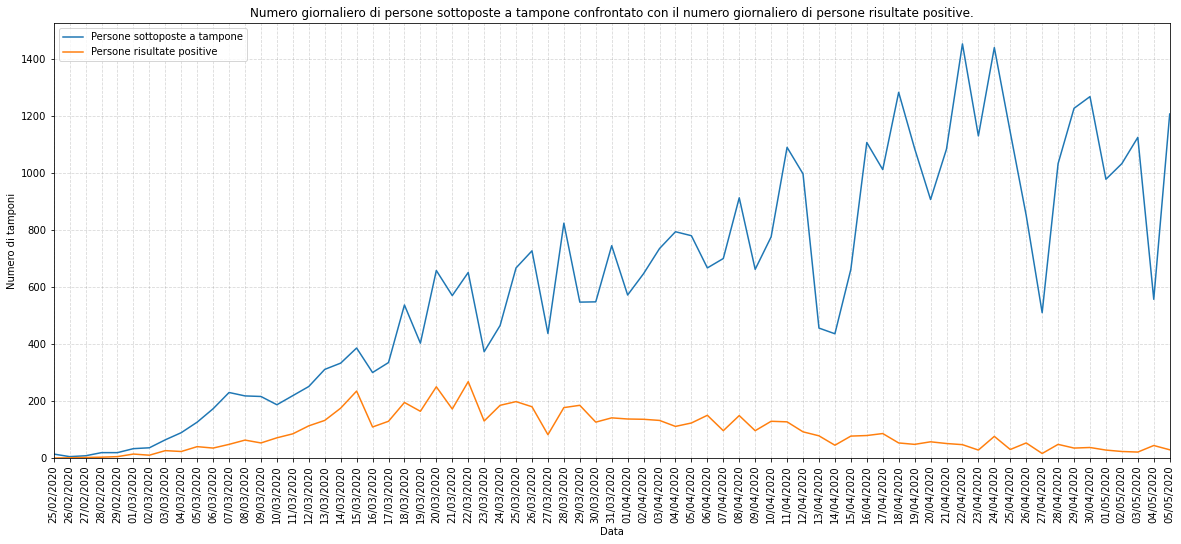

In [3]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['data'], data['tamponi_odierni_casi_diagnosticati'], label='Persone sottoposte a tampone')
ax.plot(data['data'], data['tamponi_odierni_casi_positivi'], label='Persone risultate positive')
ax.set_xlabel('Data')
ax.set_ylabel('Numero di tamponi')
ax.set_title('Numero giornaliero di persone sottoposte a tampone confrontato con il numero giornaliero di persone risultate positive.')
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=0, right=last_update)
plt.ylim(bottom=0)
plt.savefig('images/andamento-positivi-01.png', bbox_inches='tight')
plt.show()

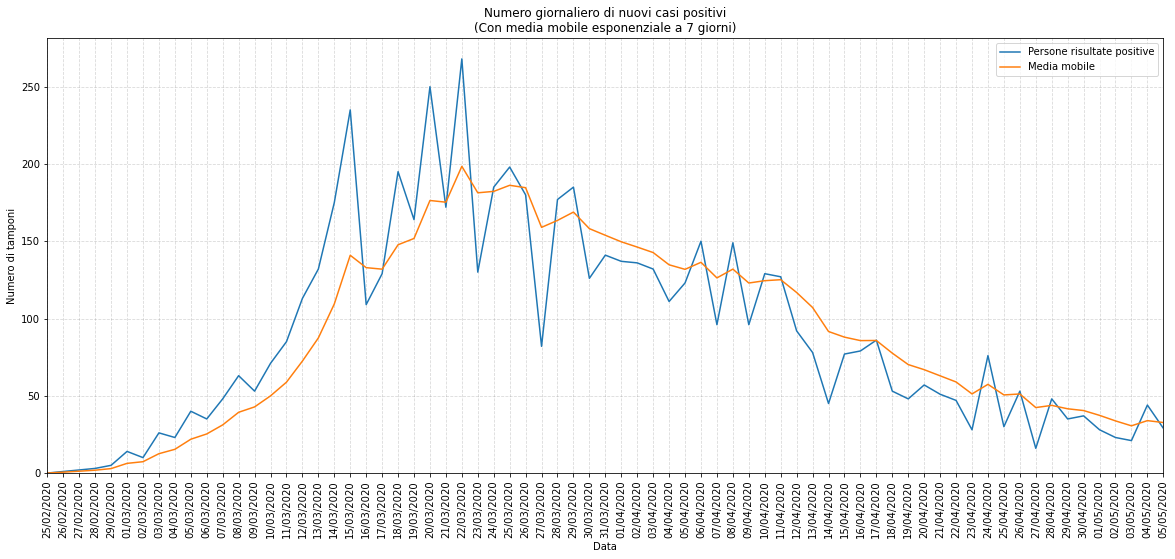

In [4]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['data'], data['tamponi_odierni_casi_positivi'], label='Persone risultate positive')
ax.plot(data['data'], data['tamponi_odierni_casi_positivi'].ewm(span=7).mean(), label='Media mobile')
ax.set_xlabel('Data')
ax.set_ylabel('Numero di tamponi')
info = '\n(Con media mobile esponenziale a 7 giorni)'
ax.set_title('Numero giornaliero di nuovi casi positivi' + info)
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=0, right=last_update)
plt.ylim(bottom=0)
plt.savefig('images/andamento-positivi-02.png', bbox_inches='tight')
plt.show()

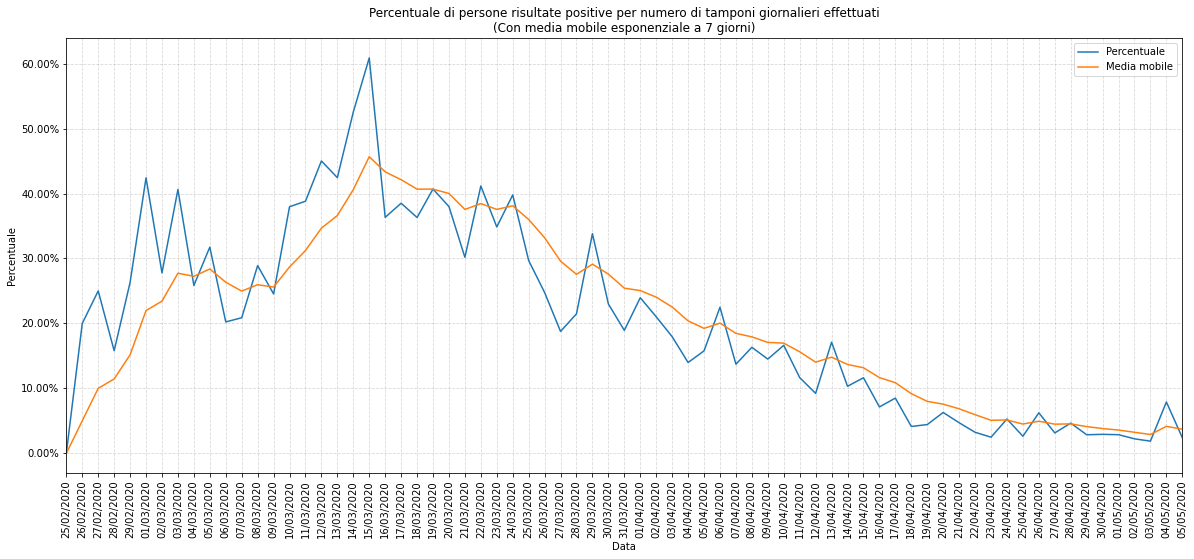

In [5]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['data'], (data['tamponi_odierni_casi_positivi']/data['tamponi_odierni_casi_diagnosticati']), label='Percentuale')
ax.plot(data['data'], (data['tamponi_odierni_casi_positivi']/data['tamponi_odierni_casi_diagnosticati']).ewm(span=7,adjust=False).mean(), label='Media mobile')
ax.set_xlabel('Data')
ax.set_ylabel('Percentuale')
info = '\n(Con media mobile esponenziale a 7 giorni)'
ax.set_title('Percentuale di persone risultate positive per numero di tamponi giornalieri effettuati' + info)
ax.legend()
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=0, right=last_update)
plt.savefig('images/andamento-positivi-03.png', bbox_inches='tight')
plt.show()

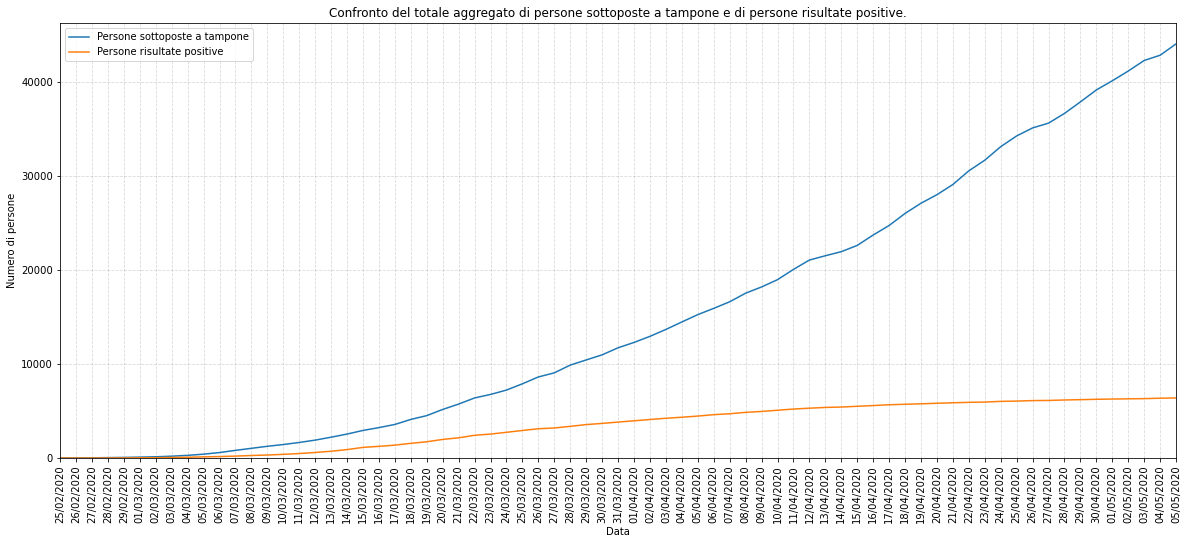

In [6]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['data'], data['tamponi_totali_casi_diagnosticati'], label='Persone sottoposte a tampone')
ax.plot(data['data'], data['tamponi_totali_casi_positivi'], label='Persone risultate positive')
ax.set_xlabel('Data')
ax.set_ylabel('Numero di persone')
ax.set_title('Confronto del totale aggregato di persone sottoposte a tampone e di persone risultate positive.')
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=0, right=last_update)
plt.ylim(bottom=0)
plt.savefig('images/andamento-positivi-04.png', bbox_inches='tight')
plt.show()

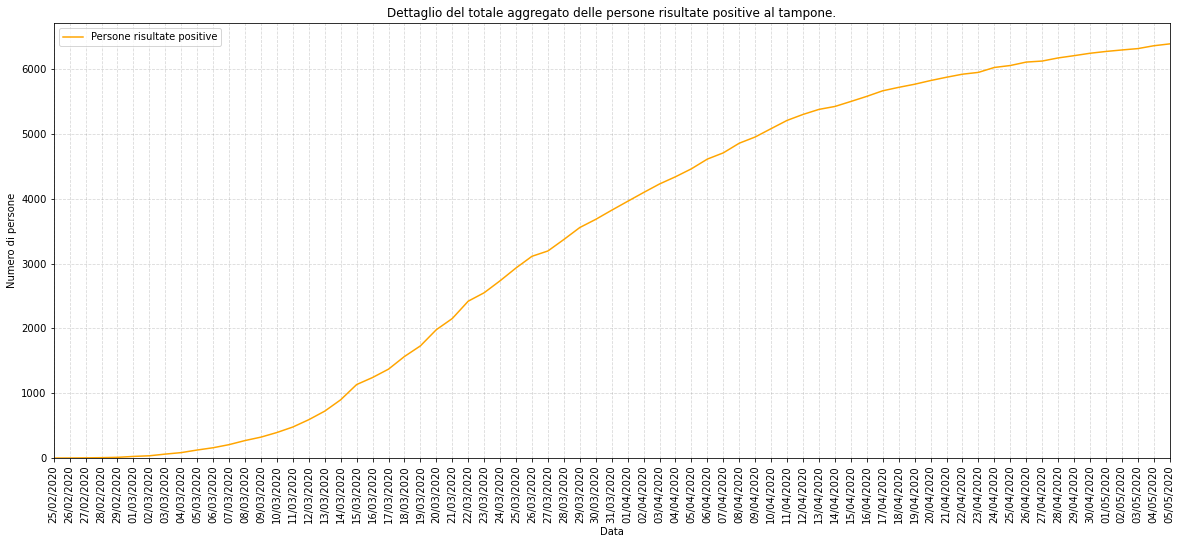

In [7]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['data'], data['tamponi_totali_casi_positivi'], label='Persone risultate positive', color='orange')
ax.set_xlabel('Data')
ax.set_ylabel('Numero di persone')
ax.set_title('Dettaglio del totale aggregato delle persone risultate positive al tampone.')
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=0, right=last_update)
plt.ylim(bottom=0)
plt.savefig('images/andamento-positivi-04-2.png', bbox_inches='tight')
plt.show()

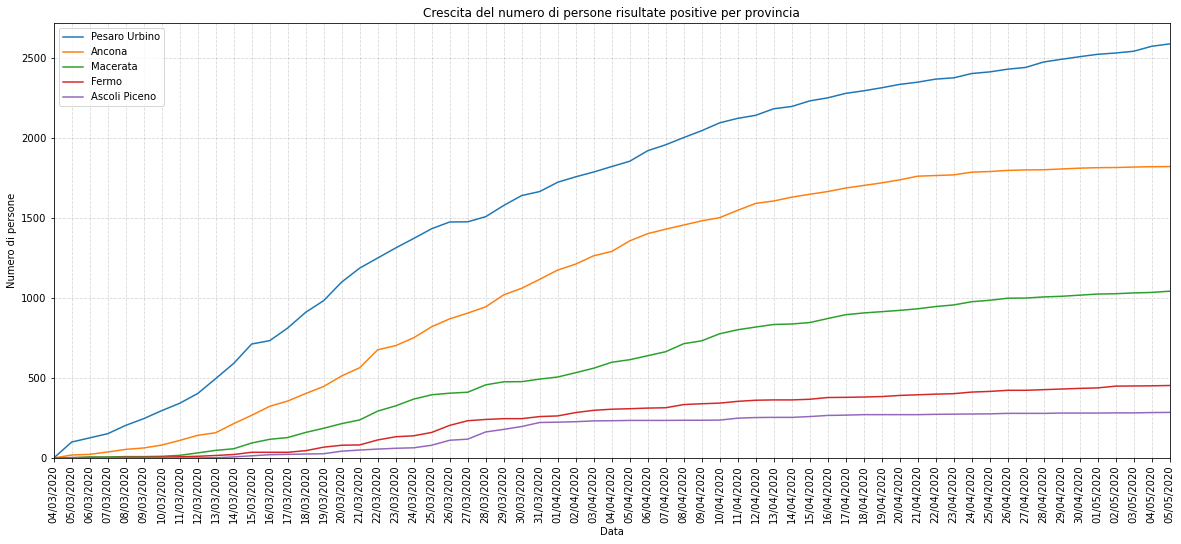

In [8]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['data'], data['malati_totali_provincia_pesaro_urbino'], label='Pesaro Urbino')
ax.plot(data['data'], data['malati_totali_provincia_ancona'], label='Ancona')
ax.plot(data['data'], data['malati_totali_provincia_macerata'], label='Macerata')
ax.plot(data['data'], data['malati_totali_provincia_fermo'], label='Fermo')
ax.plot(data['data'], data['malati_totali_provincia_ascoli_piceno'], label='Ascoli Piceno')
ax.set_xlabel('Data')
ax.set_ylabel('Numero di persone')
ax.set_title('Crescita del numero di persone risultate positive per provincia')
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=8, right=last_update) # Remove data from 25-02 to 03-03
plt.ylim(bottom=0)
plt.savefig('images/andamento-positivi-05.png', bbox_inches='tight')
plt.show()

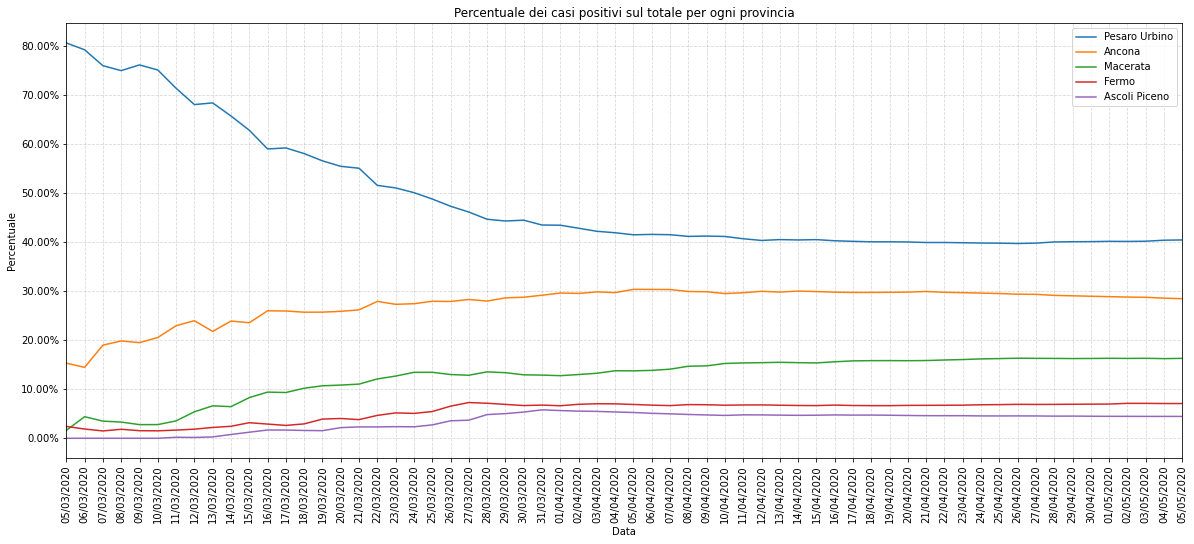

In [9]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['data'], (data['malati_totali_provincia_pesaro_urbino']/data['malati_totali_persone']), label='Pesaro Urbino')
ax.plot(data['data'], (data['malati_totali_provincia_ancona']/data['malati_totali_persone']), label='Ancona')
ax.plot(data['data'], (data['malati_totali_provincia_macerata']/data['malati_totali_persone']), label='Macerata')
ax.plot(data['data'], (data['malati_totali_provincia_fermo']/data['malati_totali_persone']), label='Fermo')
ax.plot(data['data'], (data['malati_totali_provincia_ascoli_piceno']/data['malati_totali_persone']), label='Ascoli Piceno')
ax.set_xlabel('Data')
ax.set_ylabel('Percentuale')
ax.set_title('Percentuale dei casi positivi sul totale per ogni provincia')
ax.legend()
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=9, right=last_update) # Remove data from 25-02 to 04-03
plt.savefig('images/andamento-positivi-06.png', bbox_inches='tight')
plt.show()

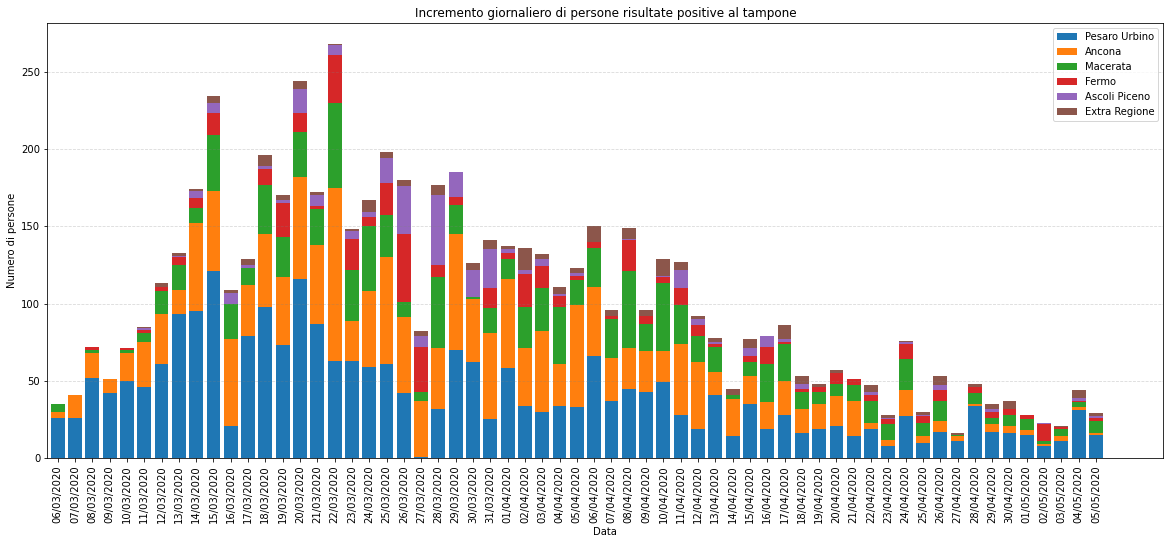

In [10]:
new_data = data['data'].iloc[1:]
d1 = data['malati_totali_provincia_pesaro_urbino'].diff().iloc[1:]
d2 = data['malati_totali_provincia_ancona'].diff().iloc[1:]
d3 = data['malati_totali_provincia_macerata'].diff().iloc[1:]
d4 = data['malati_totali_provincia_fermo'].diff().iloc[1:]
d5 = data['malati_totali_provincia_ascoli_piceno'].diff().iloc[1:]
d6 = data['malati_totali_provincia_extra_regione'].diff().iloc[1:]

bars2 = np.add(d1, d2).tolist()
bars3 = np.add(bars2, d3).tolist()
bars4 = np.add(bars3, d4).tolist()
bars5 = np.add(bars4, d5).tolist()

fig, ax = plt.subplots(figsize=(20,8))
ax.bar(new_data, d1, label='Pesaro Urbino')
ax.bar(new_data, d2, label='Ancona', bottom=d1)
ax.bar(new_data, d3, label='Macerata', bottom=bars2)
ax.bar(new_data, d4, label='Fermo', bottom=bars3)
ax.bar(new_data, d5, label='Ascoli Piceno', bottom=bars4)
ax.bar(new_data, d6, label='Extra Regione', bottom=bars5)
ax.set_xlabel('Data')
ax.set_ylabel('Numero di persone')
ax.set_title('Incremento giornaliero di persone risultate positive al tampone')
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(new_data, new_data, rotation='vertical')
plt.xlim(left=8.4) # Remove data from 25-02 to 05-03
plt.savefig('images/andamento-positivi-07.png', bbox_inches='tight')
plt.show()

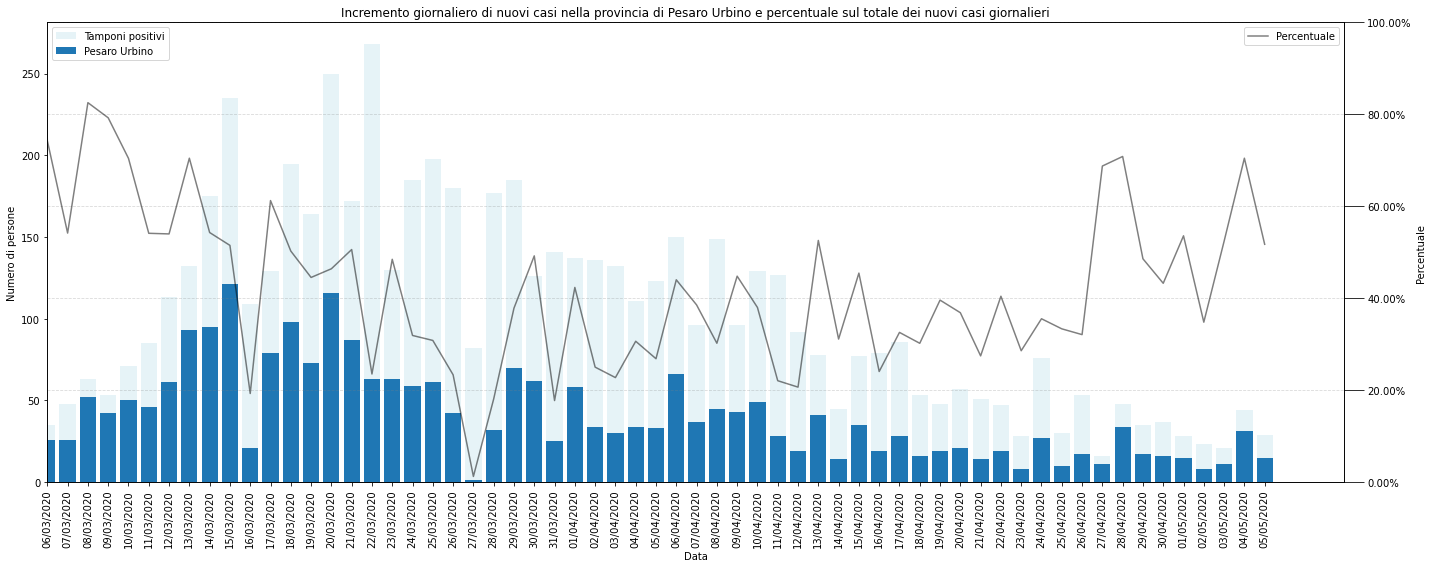

In [11]:
t = data['data'].iloc[1:]
d0 = data['malati_totali_provincia_pesaro_urbino'].diff().iloc[1:]
d1 = d0 / data['tamponi_odierni_casi_positivi'].iloc[1:]
d2 = data['tamponi_odierni_casi_positivi'].iloc[1:]

fig, ax1 = plt.subplots(figsize=(20,8))

ax1.set_xlabel('Data')
ax1.set_ylabel('Numero di persone')
ax1.bar(t, d2, color='lightblue', label='Tamponi positivi', alpha=0.3)
ax1.bar(t, d0, label='Pesaro Urbino')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=90)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

ax2.set_ylabel('Percentuale')
ax2.plot(t, d1, color='black', label='Percentuale', alpha=0.5)
ax2.tick_params(axis='y', length=20)
ax2.set_ylim(top=1, bottom=0)
ax2.legend(loc='upper right')

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

ax2.set_title('Incremento giornaliero di nuovi casi nella provincia di Pesaro Urbino e percentuale sul totale dei nuovi casi giornalieri')
fig.tight_layout()

ax2.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xlim(left=9) # Remove data from 25-02 to 05-03
plt.savefig('images/andamento-positivi-08.png', bbox_inches='tight')
plt.show()

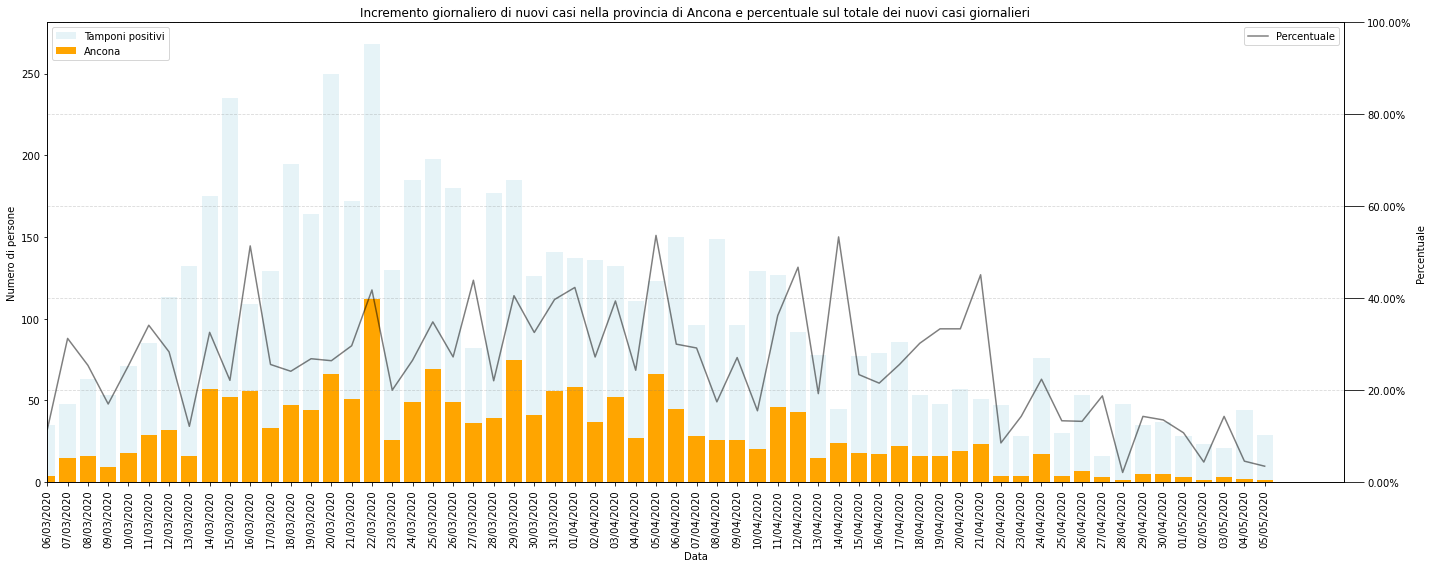

In [12]:
t = data['data'].iloc[1:]
d0 = data['malati_totali_provincia_ancona'].diff().iloc[1:]
d1 = d0 / data['tamponi_odierni_casi_positivi'].iloc[1:]
d2 = data['tamponi_odierni_casi_positivi'].iloc[1:]

fig, ax1 = plt.subplots(figsize=(20,8))

ax1.set_xlabel('Data')
ax1.set_ylabel('Numero di persone')
ax1.bar(t, d2, color='lightblue', label='Tamponi positivi', alpha=0.3)
ax1.bar(t, d0, label='Ancona', color='orange')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=90)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

ax2.set_ylabel('Percentuale')
ax2.plot(t, d1, color='black', label='Percentuale', alpha=0.5)
ax2.tick_params(axis='y', length=20)
ax2.set_ylim(top=1, bottom=0)
ax2.legend(loc='upper right')

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

ax2.set_title('Incremento giornaliero di nuovi casi nella provincia di Ancona e percentuale sul totale dei nuovi casi giornalieri')
fig.tight_layout()

ax2.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xlim(left=9) # Remove data from 25-02 to 05-03
plt.savefig('images/andamento-positivi-09.png', bbox_inches='tight')
plt.show()

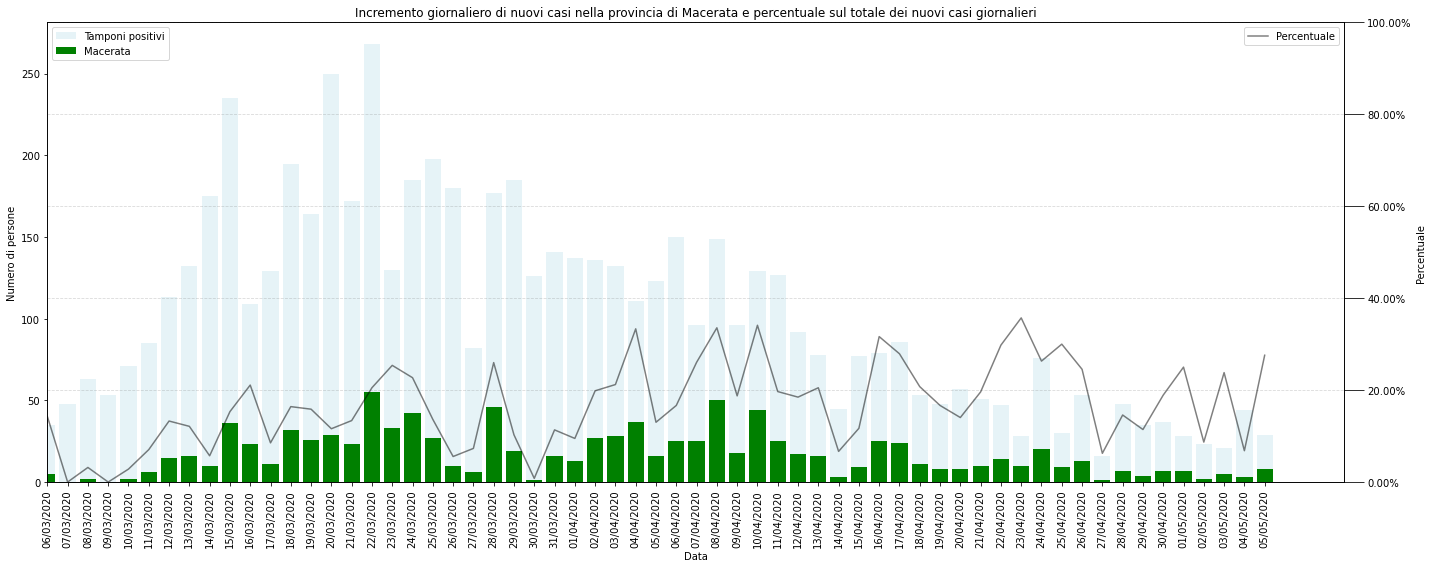

In [13]:
t = data['data'].iloc[1:]
d0 = data['malati_totali_provincia_macerata'].diff().iloc[1:]
d1 = d0 / data['tamponi_odierni_casi_positivi'].iloc[1:]
d2 = data['tamponi_odierni_casi_positivi'].iloc[1:]

fig, ax1 = plt.subplots(figsize=(20,8))

ax1.set_xlabel('Data')
ax1.set_ylabel('Numero di persone')
ax1.bar(t, d2, color='lightblue', label='Tamponi positivi', alpha=0.3)
ax1.bar(t, d0, label='Macerata', color='green')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=90)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

ax2.set_ylabel('Percentuale')
ax2.plot(t, d1, color='black', label='Percentuale', alpha=0.5)
ax2.tick_params(axis='y', length=20)
ax2.set_ylim(top=1, bottom=0)
ax2.legend(loc='upper right')

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

ax2.set_title('Incremento giornaliero di nuovi casi nella provincia di Macerata e percentuale sul totale dei nuovi casi giornalieri')
fig.tight_layout()

ax2.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xlim(left=9) # Remove data from 25-02 to 05-03
plt.savefig('images/andamento-positivi-10.png', bbox_inches='tight')
plt.show()

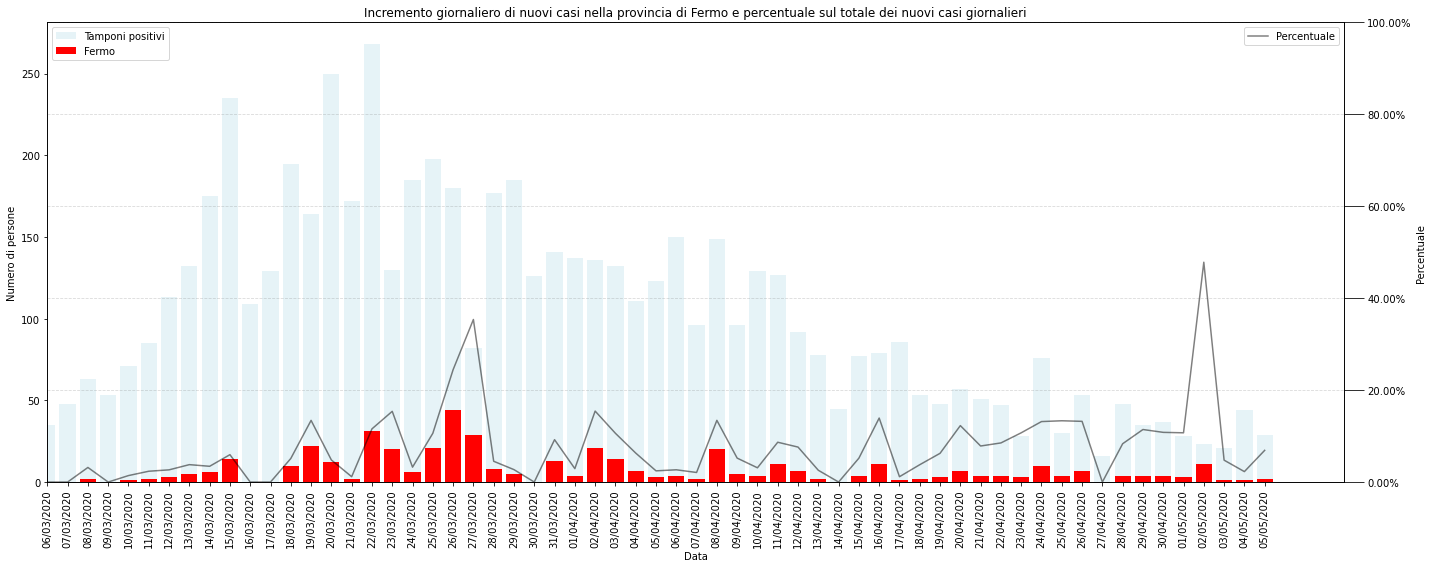

In [14]:
t = data['data'].iloc[1:]
d0 = data['malati_totali_provincia_fermo'].diff().iloc[1:]
d1 = d0 / data['tamponi_odierni_casi_positivi'].iloc[1:]
d2 = data['tamponi_odierni_casi_positivi'].iloc[1:]

fig, ax1 = plt.subplots(figsize=(20,8))

ax1.set_xlabel('Data')
ax1.set_ylabel('Numero di persone')
ax1.bar(t, d2, color='lightblue', label='Tamponi positivi', alpha=0.3)
ax1.bar(t, d0, label='Fermo', color='red')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=90)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

ax2.set_ylabel('Percentuale')
ax2.plot(t, d1, color='black', label='Percentuale', alpha=0.5)
ax2.tick_params(axis='y', length=20)
ax2.set_ylim(top=1, bottom=0)
ax2.legend(loc='upper right')

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

ax2.set_title('Incremento giornaliero di nuovi casi nella provincia di Fermo e percentuale sul totale dei nuovi casi giornalieri')
fig.tight_layout()

ax2.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xlim(left=9) # Remove data from 25-02 to 05-03
plt.savefig('images/andamento-positivi-11.png', bbox_inches='tight')
plt.show()

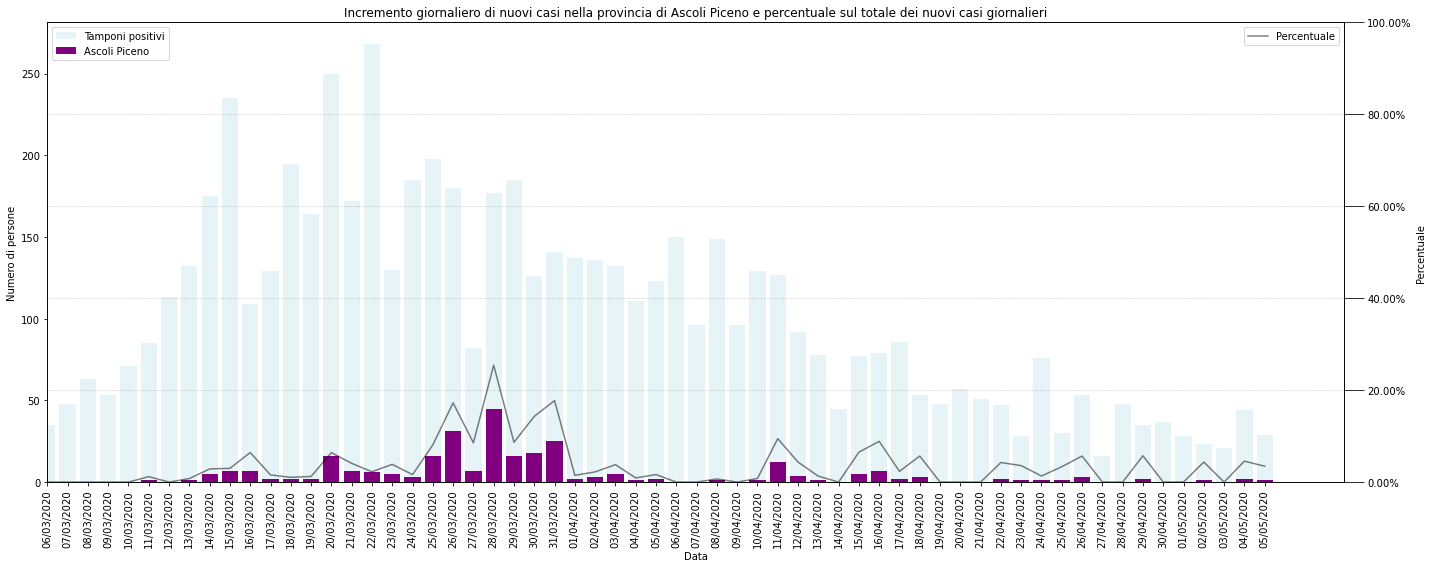

In [15]:
t = data['data'].iloc[1:]
d0 = data['malati_totali_provincia_ascoli_piceno'].diff().iloc[1:]
d1 = d0 / data['tamponi_odierni_casi_positivi'].iloc[1:]
d2 = data['tamponi_odierni_casi_positivi'].iloc[1:]

fig, ax1 = plt.subplots(figsize=(20,8))

ax1.set_xlabel('Data')
ax1.set_ylabel('Numero di persone')
ax1.bar(t, d2, color='lightblue', label='Tamponi positivi', alpha=0.3)
ax1.bar(t, d0, label='Ascoli Piceno', color='purple')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=90)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

ax2.set_ylabel('Percentuale')
ax2.plot(t, d1, color='black', label='Percentuale', alpha=0.5)
ax2.tick_params(axis='y', length=20)
ax2.set_ylim(top=1, bottom=0)
ax2.legend(loc='upper right')

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

ax2.set_title('Incremento giornaliero di nuovi casi nella provincia di Ascoli Piceno e percentuale sul totale dei nuovi casi giornalieri')
fig.tight_layout()

ax2.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xlim(left=9) # Remove data from 25-02 to 05-03
plt.savefig('images/andamento-positivi-12.png', bbox_inches='tight')
plt.show()

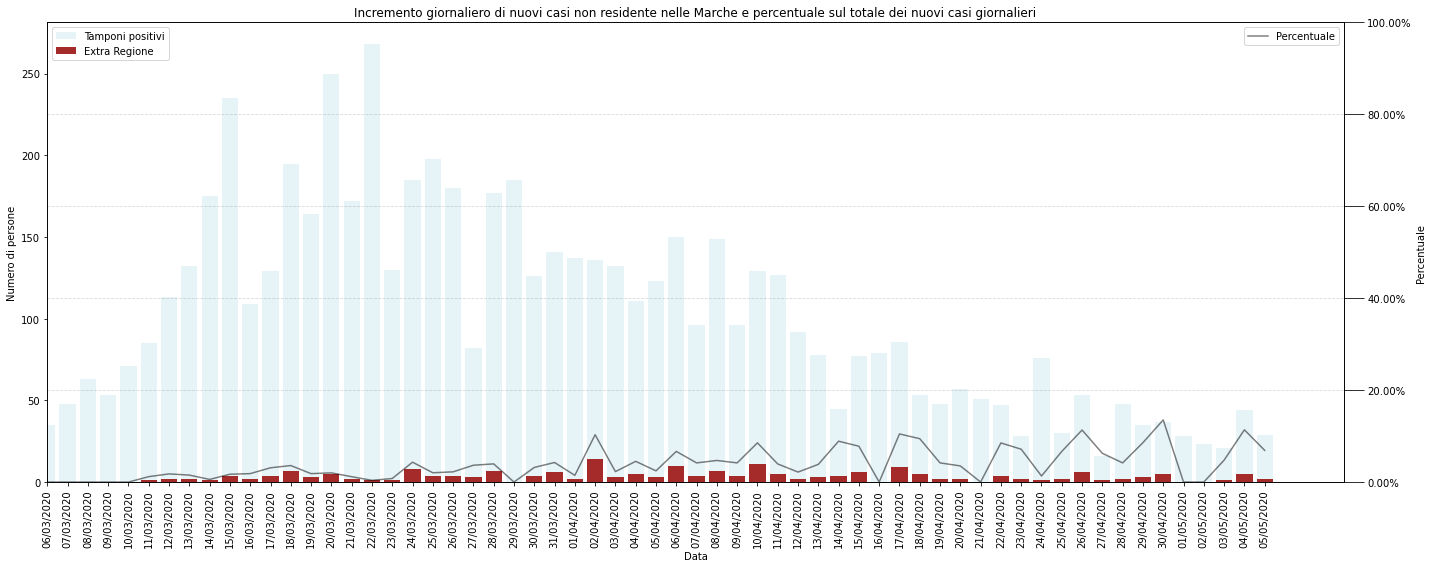

In [16]:
t = data['data'].iloc[1:]
d0 = data['malati_totali_provincia_extra_regione'].diff().iloc[1:]
d1 = d0 / data['tamponi_odierni_casi_positivi'].iloc[1:]
d2 = data['tamponi_odierni_casi_positivi'].iloc[1:]

fig, ax1 = plt.subplots(figsize=(20,8))

ax1.set_xlabel('Data')
ax1.set_ylabel('Numero di persone')
ax1.bar(t, d2, color='lightblue', label='Tamponi positivi', alpha=0.3)
ax1.bar(t, d0, label='Extra Regione', color='brown')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=90)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

ax2.set_ylabel('Percentuale')
ax2.plot(t, d1, color='black', label='Percentuale', alpha=0.5)
ax2.tick_params(axis='y', length=20)
ax2.set_ylim(top=1, bottom=0)
ax2.legend(loc='upper right')

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

ax2.set_title('Incremento giornaliero di nuovi casi non residente nelle Marche e percentuale sul totale dei nuovi casi giornalieri')
fig.tight_layout()

ax2.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xlim(left=9) # Remove data from 25-02 to 05-03
plt.savefig('images/andamento-positivi-13.png', bbox_inches='tight')
plt.show()

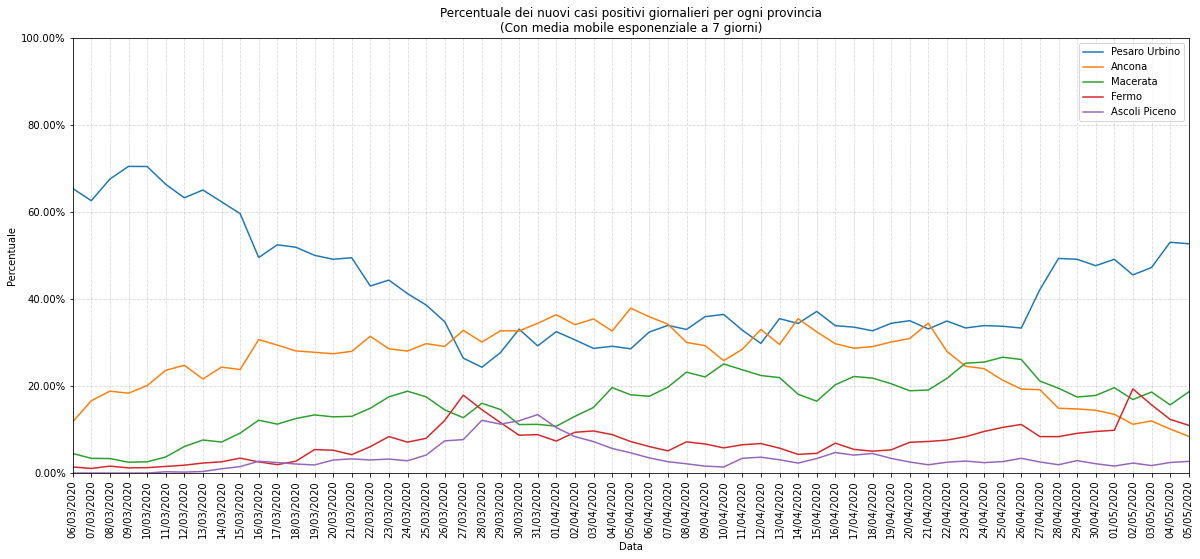

In [17]:
t = data['data'].iloc[1:]
d0 = data['tamponi_odierni_casi_positivi'].iloc[1:]
d1 = data['malati_totali_provincia_pesaro_urbino'].diff().iloc[1:] / d0
d2 = data['malati_totali_provincia_ancona'].diff().iloc[1:] / d0
d3 = data['malati_totali_provincia_macerata'].diff().iloc[1:] / d0
d4 = data['malati_totali_provincia_fermo'].diff().iloc[1:] / d0
d5 = data['malati_totali_provincia_ascoli_piceno'].diff().iloc[1:] / d0

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(t, d1.ewm(span=7,adjust=False).mean(), label='Pesaro Urbino')
ax.plot(t, d2.ewm(span=7,adjust=False).mean(), label='Ancona')
ax.plot(t, d3.ewm(span=7,adjust=False).mean(), label='Macerata')
ax.plot(t, d4.ewm(span=7,adjust=False).mean(), label='Fermo')
ax.plot(t, d5.ewm(span=7,adjust=False).mean(), label='Ascoli Piceno')
ax.set_xlabel('Data')
ax.set_ylabel('Percentuale')
info = '\n(Con media mobile esponenziale a 7 giorni)'
ax.set_title('Percentuale dei nuovi casi positivi giornalieri per ogni provincia' + info)
ax.legend()
ax.set_ylim(top=1, bottom=0)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(t, t, rotation='vertical')
plt.xlim(left=9, right=last_update) # Remove data from 25-02 to 05-03
plt.savefig('images/andamento-positivi-14.png', bbox_inches='tight')
plt.show()

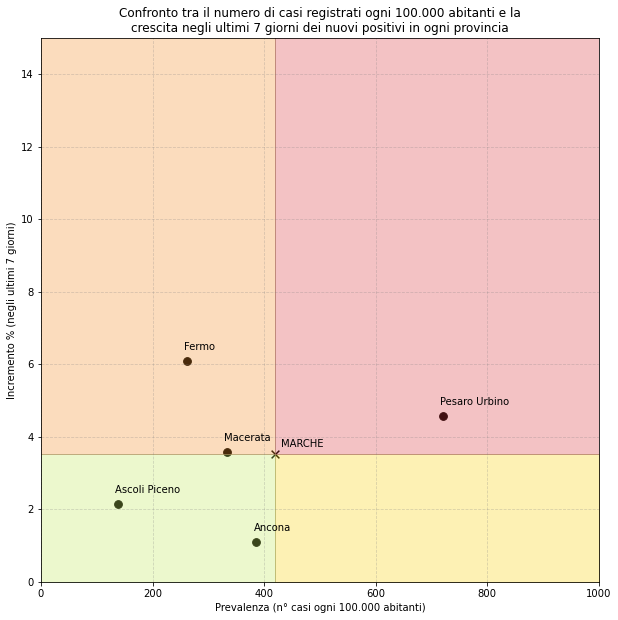

In [18]:
casi_100k_abitanti_pu = (data['malati_totali_provincia_pesaro_urbino'].max() / ABITANTI_PU) * 100000
casi_100k_abitanti_an = (data['malati_totali_provincia_ancona'].max() / ABITANTI_AN) * 100000
casi_100k_abitanti_mc = (data['malati_totali_provincia_macerata'].max() / ABITANTI_MC) * 100000
casi_100k_abitanti_fm = (data['malati_totali_provincia_fermo'].max() / ABITANTI_FM) * 100000
casi_100k_abitanti_ap = (data['malati_totali_provincia_ascoli_piceno'].max() / ABITANTI_AP) * 100000

incremento_percentuale_7_giorni_pu = (data['malati_totali_provincia_pesaro_urbino'].max() - data[-8:-7]['malati_totali_provincia_pesaro_urbino']) / data[-8:-7]['malati_totali_provincia_pesaro_urbino'] * 100
incremento_percentuale_7_giorni_an = (data['malati_totali_provincia_ancona'].max() - data[-8:-7]['malati_totali_provincia_ancona']) / data[-8:-7]['malati_totali_provincia_ancona'] * 100
incremento_percentuale_7_giorni_mc = (data['malati_totali_provincia_macerata'].max() - data[-8:-7]['malati_totali_provincia_macerata']) / data[-8:-7]['malati_totali_provincia_macerata'] * 100
incremento_percentuale_7_giorni_fm = (data['malati_totali_provincia_fermo'].max() - data[-8:-7]['malati_totali_provincia_fermo']) / data[-8:-7]['malati_totali_provincia_fermo'] * 100
incremento_percentuale_7_giorni_ap = (data['malati_totali_provincia_ascoli_piceno'].max() - data[-8:-7]['malati_totali_provincia_ascoli_piceno']) / data[-8:-7]['malati_totali_provincia_ascoli_piceno'] * 100

X = data['tamponi_totali_casi_positivi'].max() / (ABITANTI_PU + ABITANTI_AN + ABITANTI_MC + ABITANTI_FM + ABITANTI_AP) * 100000
Y = (data['malati_totali_persone'].max() - data[-8:-7]['malati_totali_persone']) / data[-8:-7]['malati_totali_persone'] * 100

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(casi_100k_abitanti_pu, incremento_percentuale_7_giorni_pu, color='black', s=60)
ax.scatter(casi_100k_abitanti_an, incremento_percentuale_7_giorni_an, color='black', s=60)
ax.scatter(casi_100k_abitanti_mc, incremento_percentuale_7_giorni_mc, color='black', s=60)
ax.scatter(casi_100k_abitanti_fm, incremento_percentuale_7_giorni_fm, color='black', s=60)
ax.scatter(casi_100k_abitanti_ap, incremento_percentuale_7_giorni_ap, color='black', s=60)
ax.scatter(X, Y, color='black', s=60, marker='x')
ax.set_xlabel('Prevalenza (n° casi ogni 100.000 abitanti)')
ax.set_ylabel('Incremento % (negli ultimi 7 giorni)')
ax.set_title('Confronto tra il numero di casi registrati ogni 100.000 abitanti e la\ncrescita negli ultimi 7 giorni dei nuovi positivi in ogni provincia')

ax.annotate('Pesaro Urbino', (casi_100k_abitanti_pu, incremento_percentuale_7_giorni_pu), (casi_100k_abitanti_pu-5, incremento_percentuale_7_giorni_pu+0.3))
ax.annotate('Ancona', (casi_100k_abitanti_an, incremento_percentuale_7_giorni_an), (casi_100k_abitanti_an-5, incremento_percentuale_7_giorni_an+0.3))
ax.annotate('Macerata', (casi_100k_abitanti_mc, incremento_percentuale_7_giorni_mc), (casi_100k_abitanti_mc-5, incremento_percentuale_7_giorni_mc+0.3))
ax.annotate('Fermo', (casi_100k_abitanti_fm, incremento_percentuale_7_giorni_fm), (casi_100k_abitanti_fm-5, incremento_percentuale_7_giorni_fm+0.3))
ax.annotate('Ascoli Piceno', (casi_100k_abitanti_ap, incremento_percentuale_7_giorni_ap), (casi_100k_abitanti_ap-5, incremento_percentuale_7_giorni_ap+0.3))
ax.annotate('MARCHE', (X, Y), (X+10, Y+0.2))

ax.axvline(X, color='gray', linestyle='solid', lw=1, alpha=0.4)
ax.axhline(float(Y), color='gray', linestyle='solid', lw=1, alpha=0.4)

ax.fill_between([0, X],0,Y,alpha=0.3, color='#c2e85c')  # blue
ax.fill_between([X, 1000], 0, Y, alpha=0.3, color='#F9D307')  # yellow
ax.fill_between([0, X], Y, 1000, alpha=0.3, color='#F38D25')  # orange
ax.fill_between([X, 1000], Y, 1000, alpha=0.3, color='#DA383D')  # red

plt.xlim(left=0, right=1000)
plt.ylim(bottom=0, top=15)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
plt.savefig('images/andamento-positivi-15.png', bbox_inches='tight')
plt.show()